In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dfTrain = pd.read_csv('train.csv')
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


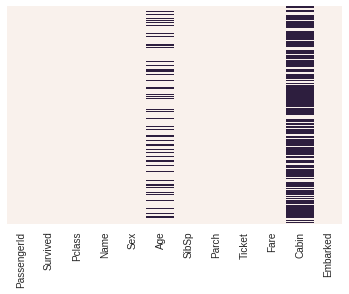

In [6]:
sns.heatmap(dfTrain.isnull(),yticklabels=False,cbar=False)

#### Some exploration

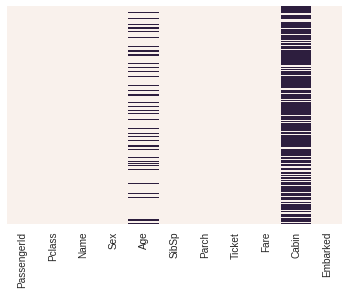

In [7]:
dfTest = pd.read_csv('test.csv')
sns.heatmap(dfTest.isnull(),yticklabels=False,cbar=False)

In [8]:
sns.set_style('whitegrid')

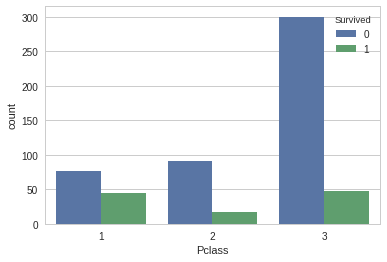

In [24]:
sns.countplot(x='Pclass',hue='Survived',data=dfTrain[dfTrain['Sex']=='male'])

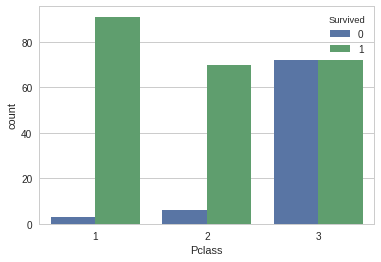

In [48]:
sns.countplot(x='Pclass',hue='Survived',data=dfTrain[dfTrain['Sex']=='female'])

In [53]:
# Females, 1st class:
dfTrain[(dfTrain['Sex']=='female') & (dfTrain['Pclass']==1)]['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [54]:
# Females, 2nd class:
dfTrain[(dfTrain['Sex']=='female') & (dfTrain['Pclass']==2)]['Survived'].value_counts()

1    70
0     6
Name: Survived, dtype: int64

In [56]:
# Males, 3rd class:
dfTrain[(dfTrain['Sex']=='male') & (dfTrain['Pclass']==3)]['Survived'].value_counts()

0    300
1     47
Name: Survived, dtype: int64

In [57]:
# Males, 2nd class:
dfTrain[(dfTrain['Sex']=='male') & (dfTrain['Pclass']==2)]['Survived'].value_counts()

0    91
1    17
Name: Survived, dtype: int64

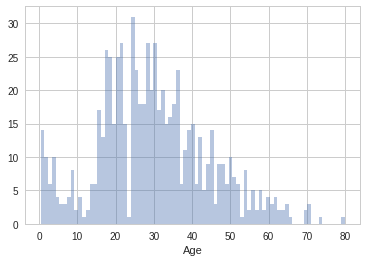

In [26]:
sns.distplot(train['Age'].dropna(),kde=False,bins=81)

Explore SibSp

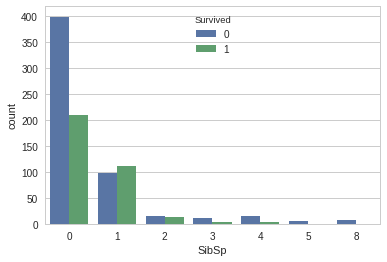

In [65]:
sns.countplot(x='SibSp',hue='Survived',data=train)

In [42]:
def CleanDummiesAndDrops(df):
    # Get dummies
    sex=pd.get_dummies(df['Sex'],drop_first=True)
    pclass=pd.get_dummies(df['Pclass'],drop_first=True)
    embark=pd.get_dummies(df['Embarked'],drop_first=True)
    df=pd.concat([df,sex,embark],axis=1)
    # Drop 'Sex' and 'Embarked' because they were replaced with dummies
    # Drop 'Name' and 'Ticket' because we don't want to use them in the model
    df.drop(['Sex','Embarked','Name','Ticket','Pclass','Fare','Cabin'],axis=1,inplace=True)
    return df

def Clean(df):
    df = CleanDummiesAndDrops(df)
    dfAge = df.dropna()
    dfNoAge = df.drop(['Age'],axis=1)   
    return (dfAge, dfNoAge)

In [65]:
(dfTrainAge, dfTrainNoAge) = Clean(dfTrain)
(dfTestAge, dfTestNoAge) = Clean(dfTest)

In [60]:
dfTrainAge.head()

,PassengerId,Survived,Age,SibSp,Parch,male,Q,S
0,1,0,22.0,1,0,1,0,1
1,2,1,38.0,1,0,0,0,0
2,3,1,26.0,0,0,0,0,1
3,4,1,35.0,1,0,0,0,1
4,5,0,35.0,0,0,1,0,1


In [45]:
dfTrainAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
male           714 non-null uint8
Q              714 non-null uint8
S              714 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 35.6 KB


In [74]:
dfTestAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 7 columns):
PassengerId    332 non-null int64
Age            332 non-null float64
SibSp          332 non-null int64
Parch          332 non-null int64
male           332 non-null uint8
Q              332 non-null uint8
S              332 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 13.9 KB


In [76]:
dfTrainNoAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: int64(4), uint8(3)
memory usage: 30.5 KB


In [77]:
dfTestNoAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: int64(3), uint8(3)
memory usage: 11.1 KB


In [68]:
dfTestNoAge.head()

,PassengerId,SibSp,Parch,male,Q,S
0,892,0,0,1,1,0
1,893,1,0,0,0,1
2,894,0,0,1,1,0
3,895,0,0,1,0,1
4,896,1,1,0,0,1


In [69]:
dfTestNoAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: int64(3), uint8(3)
memory usage: 11.1 KB


Great for machine learning: all data is numerical, no missing data, everything concatenated together

In [58]:
from sklearn.linear_model import LogisticRegression

In [81]:
def FitAndPredict(df1,df2):
    X_train = df1.drop(['PassengerId','Survived'],axis=1)
    y_train = df1['Survived']
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(df2.drop(['PassengerId'],axis=1))
    return predictions

In [84]:
predAge = FitAndPredict(dfTrainAge,dfTestAge)
predNoAge = FitAndPredict(dfTrainNoAge,dfTestNoAge)

#### Prepare submit.csv

In [92]:
dfNew=pd.DataFrame(columns=('PassengerId', 'Survived'))

i_age=0
for i in range(418):
    PassId = dfTest.loc[i]['PassengerId']
    surv=0
    if (dfTest.isnull().loc[i]['Age']==True): surv=predNoAge[i]
    else: 
        surv=predAge[i_age]
        i_age = i_age+1    
    
    dfNew.loc[i] = pd.Series({'PassengerId':PassId,'Survived':surv})

dfNew.to_csv('sumbit.csv',index=False)